# Pymaceuticals Inc.
---
### Introduction
We aggregated two seets of data from the lab:<br>
`Study_results.csv` contains mouse id, timepoint, tumor volume, and metastatic sites.<br>
`Mouse_metadata.csv` contains mouse id, drug regimen, sex, age, and weight.<br>
The study group by drug regimen explored at the lab are: <br>
$Capomulin$, $Ceftamin$, $Infubinol$, $Ketapril$, $Naftisol$, $Propriva$, $Ramicane$, $Stelasyn$, $Zoniferol$ with ***Placebo*** as the control group.<br>
The controlled variable was initial tumor size, so all mice have a tumor volume of $45mm^3$ at timepoint $0 days$, and mice were monitored for up to $45 days$, with some mice expiring before that time.<br>
Most drug regimens have sample size of $25$, with $Propriva$ and $Stelasyn$ having a sample size of $24$, perhaps due to the duplicate entry for a  particular mouse and timpoint with different tumor volumes which were removed from the data set. So it is likely that all drug regimens started with a sample size of $25$.<br>
The median timepoint for $Capomulin$, $Ceftamin$, $Ketapril$, $Naftisol$, $Ramicane$, $Stelasyn$ is $20 days$, and the median timpoint for $Infubinol$, $Propriva$, $Zoniferol$, and the *Placebo* is $15 days$.<br>

---
### Analysis
#### Summary Statistics
We first looked at the summary statistics by drug regimen of the tumor volume over time, and looked at mean, median, variance, standard deviation, and SEM. Looking at the chart, there are two drugs $Capomulin$ and $Ramicane$ of note with means and medians below the initial $45mm^3$ ($40.68mm^3, 41.6mm^3$ and $40.22mm^3,	40.67mm^3$ respectively), indicating that these two may be effective in reducing tumor size with $Ramicane$ performing slightly better. The other drugs have similar results as the *Placebo* which has a mean of $54.03mm^3$ and median of $52.29mm^3$, with means and medians of the other drugs falling within $1.5mm^3$ of the *Placebo*.
#### Bar and Pie Charts
**Bar Chart:** The bar chart looks at the total number of mice timeplots for each drug regimen, and it corroborates the the summary statistics in that there is more observed timepoints for the two drugs $Capomulin$ and $Ramicane$ implying that more mice survived for longer. An anomaly is that $Propriva$ which has significantly less observed timepoints, which is perhaps due to the removal of mouse $g989$ from the data due to a double entry.<br>
**Pie Chart:** The pie chart show the percentage of the population based on sex with $51$*%* being male, and $49$*%* being female, which is relatively even distributioin of gender to prevent a gender bias.
#### Quartiles, Outliers and Boxplots
For this section, we started by extracting the final tumor volumne for each mouse, then calculated the quartiles and IQR. There was one outlier for the whole data set, and it was for the drug regimen $Infubinol$ where mouse $
c32$ had a final tumor volume of $ 36.32134mm^3$. Otherwise the box plot clearly presents that $Capomulin$ and $Ramicane$ have potential for reducing tumors with mice on $Ramicane$ showing almost no growth in tumor and greater reductions in tumor size, while the other treatment groups show growth in tumor size over time with variable tumor growth rates that may suggest that the difference between $Capomulin$ and $Ramicane$ may be due to external factors no addressed in this data set.6
#### Line and Scatter Plots, Correlation and Regression
We looked at the mice in the drug regimens that reduced tumor size: $Capomulin$ and $Ramicane$.
**Line Plot:** The line plot looks at tumor volume over time for a given mouse, and shows the progression of reduction of tumor size over time.<br>
**Scatter Plot:** The scatter plot explores for a given drug regimen, mouse weight vs average tumor size, to see if there is a correlation between the two. The result is that $Capomulin$ has a correlation value of $0.84$ with linear regression equation of $y=0.95x+21.55$, and $Ramicane$ has a correlation value of $0.81$ with linear regression $y=0.77x+25.16$.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].nunique()

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989'].reset_index(drop=True)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of the tumor volume for each drug regimen
# Use groupby and summary statistical methods to calculate the following properties: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

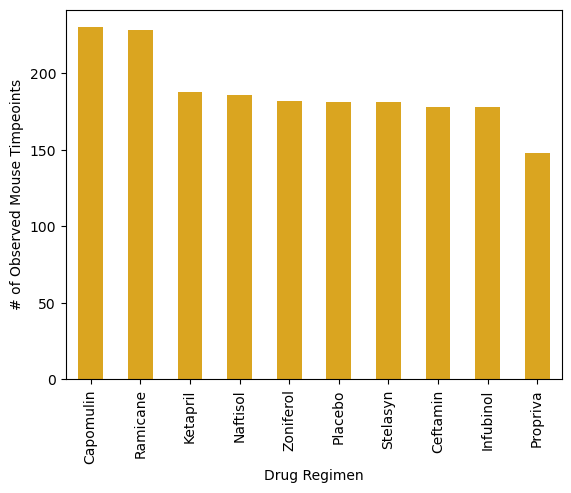

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = regimen_summary.count().sort_values(ascending=False)
regimen_counts.plot.bar(color='#daa520', ylabel='# of Observed Mouse Timpeoints')
plt.show()

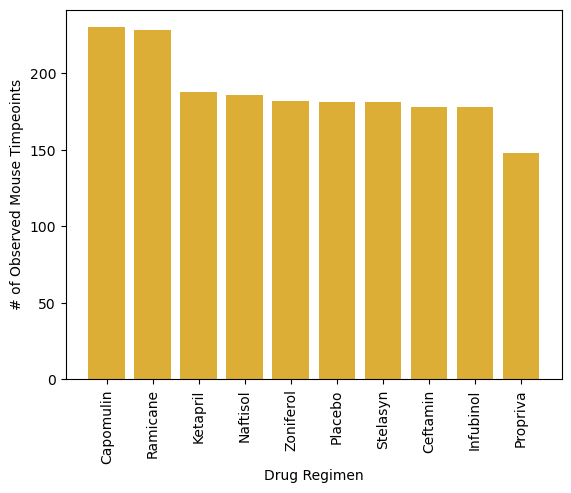

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = [1,2,3,4,5,6,7,8,9,10]
plt.bar(x_axis, regimen_counts, color='#daa520', alpha=0.9, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_counts.index, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpeoints')
plt.show()

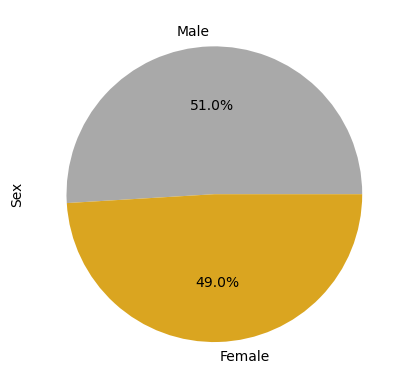

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df.groupby('Sex')['Mouse ID'].count().sort_values(ascending=False)
sex_counts.plot.pie(ylabel='Sex', autopct="%1.1f%%", colors=['#a9a9a9','#daa520'])
plt.show()

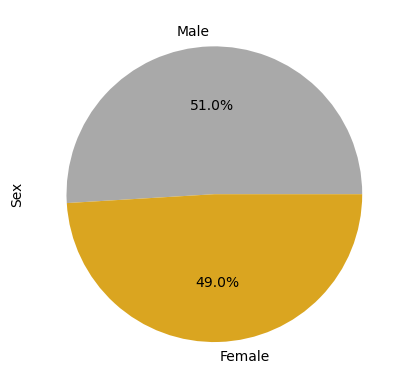

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts.values, labels=sex_counts.index, colors=['#a9a9a9','#daa520'], autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
new_col = 'Final Tumor Volume (mm3)'
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
final_tumor_vol = pd.Series(data=[clean_df.loc[(clean_df['Mouse ID'] == i) & (clean_df['Timepoint'] == max_timepoint[i]),
                                  'Tumor Volume (mm3)'].values[0] for i in max_timepoint.index],
                            index=max_timepoint.index,
                            name=new_col)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(clean_df,final_tumor_vol, how="left", on=["Mouse ID", "Mouse ID"])

In [99]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] <- to look only for those four regimens
treatments = clean_df['Drug Regimen'].unique()
# Locate the rows which contain mice on each drug and get the tumor volumes, add subset
treatments_data = pd.Series(data=[new_df[new_df['Drug Regimen']==drug].groupby('Mouse ID')[new_col].mean() for drug in treatments],
                               index=treatments, name=f'{new_col} by Treatment')
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Determine outliers using upper and lower bounds
    quartiles = treatments_data[drug].quantile([.25,.5,.75])
    low_bd = quartiles[0.25] - 1.5*(quartiles[0.75]-quartiles[0.25])
    upp_bd = quartiles[0.75] + 1.5*(quartiles[0.75]-quartiles[0.25])
    print(f"{drug}'s potential outliers: {treatments_data[drug][lambda x: (x<low_bd)|(x>upp_bd)]}")

Capomulin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ketapril's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Mouse ID
c326    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Stelasyn's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Placebo's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


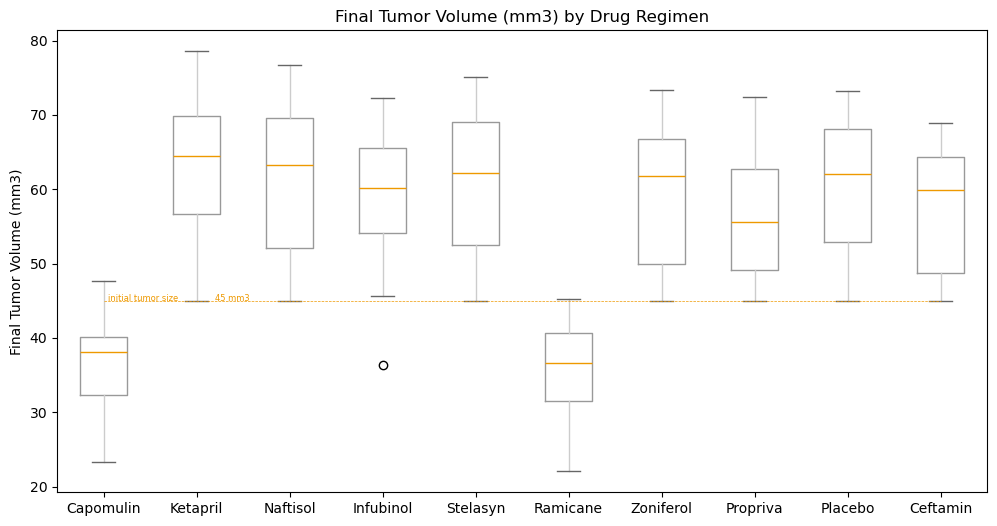

In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments_df = pd.DataFrame(data=[treatments_data[x].values for x in treatments], index = treatments).transpose()
treatments_df.boxplot(ylabel=new_col, grid=False, figsize=(12,6),
                      color = dict(boxes='#999', whiskers='#ccc', medians='#ee9900', caps='#666'))
plt.plot(list(range(1,11)),[45,45,45,45,45,45,45,45,45,45],"#ee9900",linestyle='--',linewidth=0.5)
plt.title(f'{new_col} by Drug Regimen')
plt.annotate('initial tumor size',(1.05,45),fontsize=6,color="#ee9900")
plt.annotate('45 mm3',(2.2,45),fontsize=6,color="#ee9900")
plt.show()

## Line and Scatter Plots

In [115]:
# Display list of Mouse IDs for Capomulin or Ramicane
mice = {'Capomulin':clean_df.groupby('Drug Regimen')['Mouse ID'].unique().tolist()[0],
        'Ramicane':clean_df.groupby('Drug Regimen')['Mouse ID'].unique().tolist()[7]}
print(f"Capomulin: {mice['Capomulin']}")
print(f"Ramicane: {mice['Ramicane']}")
# Get a single mouse based on input to generate a line plot of tumor volume vs. time point
# default is to get a random single mouse treated with Capomulin
print('Enter Mouse ID or Drug Regimen from above')
id = input('else a random mouse treated with Capomulin will be chosen: ')
if id.lower() == 'ramicane':
    id = rami_mice[random.randint(0,24)]
    print(f'Ramicane: {id}')
elif not id in clean_df['Mouse ID'].unique().tolist():
    id = capo_mice[random.randint(0,24)]
    print(f'Capomulin: {id}')

Capomulin: ['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']
Ramicane: ['c458' 'q610' 'j913' 'a411' 'a444' 'd251' 'j989' 'y449' 'k403' 'c758'
 'r811' 'a644' 'i177' 'g791' 'a520' 'u196' 'm546' 'w678' 'n364' 's508'
 'e662' 'z578' 'r921' 'q597' 'i334']
Enter Mouse ID or Drug Regimen from above


else a random mouse treated with Capomulin will be chosen:  


Capomulin: j119


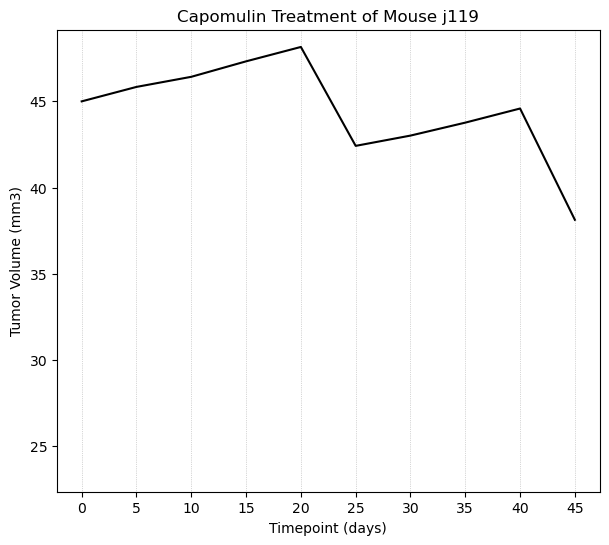

In [116]:
# Generate a line plot of tumor volume vs. time point for a single mouse from above
# (defaults to a mouse treated with Capomulin)
drug = clean_df[(clean_df["Mouse ID"]==id)&(clean_df["Timepoint"]==0)]["Drug Regimen"].values[0]
# Create new DataFrame of Drug
drug_df = clean_df[clean_df['Drug Regimen']==drug].sort_values(['Mouse ID','Timepoint'])
# Set chart settings
ylim = (drug_df['Tumor Volume (mm3)'].min()-1,drug_df['Tumor Volume (mm3)'].max()+1)
size = (7,6)
# Draw Chart
drug_df[drug_df['Mouse ID']==id].plot(x='Timepoint', y='Tumor Volume (mm3)',
                                      xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)',
                                      color='black', legend=False, figsize=size, ylim=ylim,
                                      xticks=[0,5,10,15,20,25,30,35,40,45],
                                      title=f'{drug} Treatment of Mouse {id}')
plt.grid(True, axis='x', linestyle=':', linewidth=0.5)
plt.show()

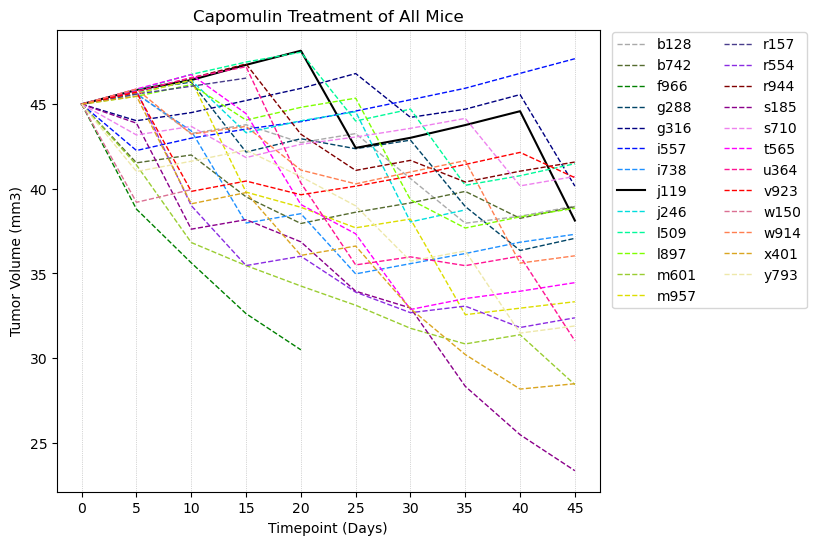

In [117]:
# Generate a line plot of tumor volume vs. time point for all mice in drug regimen
colors=['#a9a9a9','#556b2f','#008000','#004466','#000080','#0011ff','#1e90ff','#00bfff','#00dddd','#00fa9a','#7fff00','#9acd32','#dddd00',
        '#483d8b','#8a2be2','#800000','#8b008b','#ee82ee','#ff00ff','#ff1493','#ff0000','#db7093','#ff7f50','#daa520','#eee8aa']
plt.figure(figsize=size)
for m in drug_df['Mouse ID'].unique():
    if m == id:
        plt.plot(drug_df[drug_df['Mouse ID']==m]['Timepoint'], drug_df[drug_df['Mouse ID']==m]['Tumor Volume (mm3)'], label=m,
                 color='black', linewidth=1.5, linestyle='-')
    else:
        plt.plot(drug_df[drug_df['Mouse ID']==m]['Timepoint'], drug_df[drug_df['Mouse ID']==m]['Tumor Volume (mm3)'], label=m,
                 color=colors[drug_df['Mouse ID'].unique().tolist().index(m)], linewidth=1, linestyle='--')
plt.title(f'{drug} Treatment of All Mice')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='upper left', ncol=2, bbox_to_anchor=(1.01, 1.01))
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.grid(True, axis='x', linestyle=':', linewidth=0.5)
plt.show()

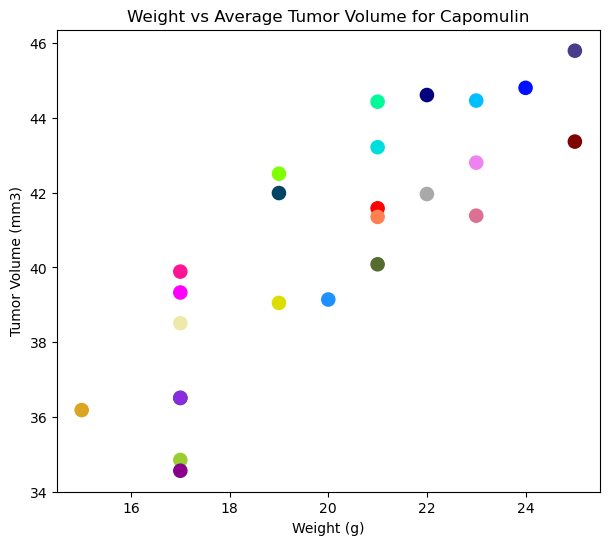

In [118]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire drug regimen
drug_data=drug_df.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
drug_data.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', s=90, color=colors, figsize=size,
                       title=f'Weight vs Average Tumor Volume for {drug}')
plt.show()

## Correlation and Regression

In [119]:
# Calculate the correlation coefficient for mouse weight and average tumor volume drug regimen
correlation = st.pearsonr(drug_data['Weight (g)'], drug_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


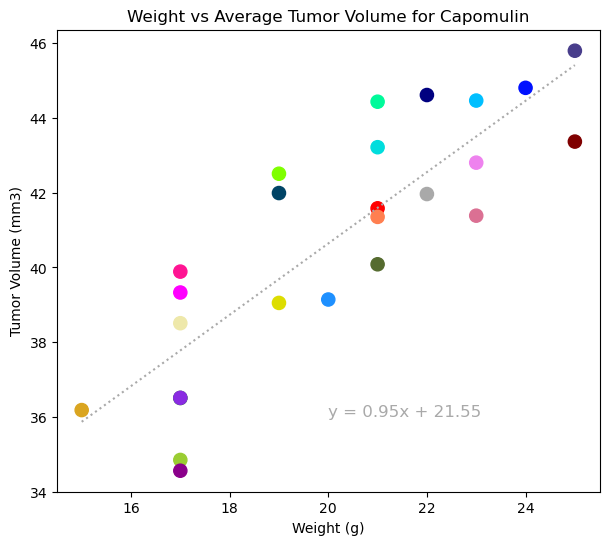

In [120]:
# Calculate a linear regression mode for mouse weight and average tumor volume drug regimen
m, b, r, p, std_err = st.linregress(drug_data['Weight (g)'], drug_data['Tumor Volume (mm3)'])
x = drug_data['Weight (g)'].sort_values().unique()
lin_reg = m*x+b
lin_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
drug_data.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', s=90, color=colors, figsize=size,
                       title=f'Weight vs Average Tumor Volume for {drug}')
plt.plot(x, lin_reg, color="#a9a9a9", linestyle=':')
plt.annotate(lin_eq, (20,36), fontsize=12, color="#a9a9a9")
plt.show()